# Introduction

This dataset includes data for graduate degrees admission collected from Indian applicants, originally found on "Kaggle" (https://www.kaggle.com/mohansacharya/graduate-admissions)

The set includes the following Columns : Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit

A quick glance at the datasets' columns allows us to conclude the following basic facts and assumptions:
1. Serial number is just for providing a unique index and we can thus drop the column for serial numbers in our analysis. In replace, Panda will generate its own serial numbers for us. 

2. All columns are assumed to share some correlation with the chance of admission. 

In a following section while "Exploring the Data", we will go through each variable individually.

# Analysis

In [152]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import colors
from matplotlib.pyplot import pie, axis, show
import seaborn as sns

In [153]:
data = pd.read_csv('C:\\Users\\niyun\\workspace\\Admission_Predict_Ver1.1.csv')

In [154]:
# Let's see what columns we have.
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [155]:
# First, let's rename the variables "LOR " and "Chance of Admit " so that we no longer have the extra space at the end of these two labels.
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

In [156]:
# Now, let's get the head of the data.
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [157]:
# Let's get the general statistics of the data.
data.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [158]:
#Let's also get the information of each category.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


From the summary table above, we can see that there are five hundred samples in this data. 
GRE Score: ranges from 290 to 340 
TOEFL Score: ranges from 92 to 120
University Rating: numerical value between 1 to 5, in 1-point increment
SOP: statement of purpose: numerical value between 1 to 5, in 1-point increment
Letters of Recommendation: numerical value between 1 to 5, in 1-point increment
Research: has only two values, 0 or 1. 

In [159]:
# Let's look at the correlation coefficients. 
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


From the correlation coefficients table above, we can see that the GRE score and the CGPA share the strongest possitive correlation (0.81 and 0.88, respectively) with the chance of admission. 

The Graduate Record Examinations (GRE) is a standardized test that is an admissions requirement for most graduate schools in the United States. It contains three parts: Analytial Writing, Verbal, Quantitative. Both the Verbal and the Quantitative sections are scored on a scale of 130 to 170, in one-point increment, and the Writing section is scored on a scale of 1 to 6, in half-point increment. 

Notice that in this data set, the column GRE Score notates the sum of the Verbal and the Quantitative sections, and did not take into consideration the Analytical Writing part. 

According to an official GRE score document, the mean test score for all individuals from July 1,2014 to June 30,2017 (almost 1,700,000 test taker) is 302.85, which rounds to 302,
https://www.ets.org/s/gre/pdf/gre_interpreting_scores.pdf

In [160]:
# We begin by looking at the GRE Score of this sample in more details. Let's first get the general statistics of the GRE Score. 
GRE = pd.DataFrame(data['GRE Score'])
GRE.describe()

,GRE Score
count,500.000000
mean,316.472000
std,11.295148
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


The sample mean is 316.47, about 5 percent greater than the mean test score provided by the official document.

From the GRE Score Histogram below, we can see that most students in the sample have a GRE test score between 310 and 330. 

GRE Score    316.472
dtype: float64
GRE Score    11.295148
dtype: float64


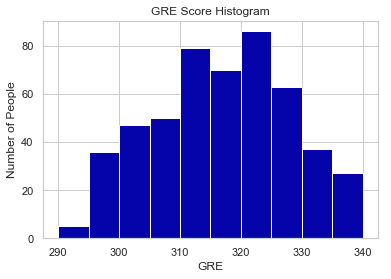

In [161]:
#visualization - histogram
GRE_graph = np.reshape(np.asarray(GRE), (500))
n, bins, patches = plt.hist(x=GRE_graph, bins=10, color='#0504aa')
plt.grid(axis='number of people', alpha=0.75)
plt.xlabel('GRE')
plt.ylabel('Number of People')
plt.title('GRE Score Histogram')
print(GRE.mean())
print(GRE.std())

From the boxplot of GRE Test Scores below, we can see that the sample has no outliers. All the scores fall between the first and the third quartiles. This tells us that the sample scores spread around the mean and has no statistically uncommon values. 

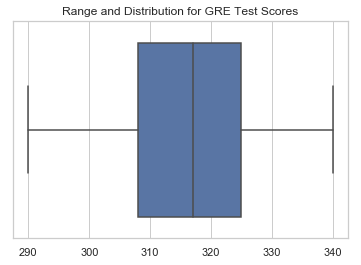

In [162]:
#Visualization - boxplot
sns.set(style="whitegrid")
sns.boxplot(GRE).set_title('Range and Distribution for GRE Test Scores')
plt.show()

From the probability distribution graph below, we can see that the GRE Test Scores in this sample roughly follow a normal distribution. This will allow us to predict the probability of a particular score. 

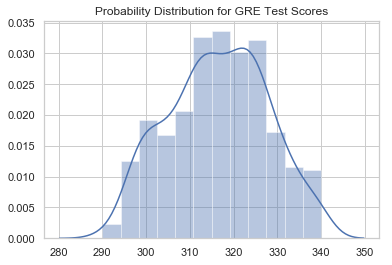

In [163]:
# Visualization - probability distribution
sns.distplot(GRE).set_title('Probability Distribution for GRE Test Scores')
plt.show()

In [164]:
# We now move on to look at another highly correlated factor, namely, the applicant's college GPA.
CGPA = pd.DataFrame(data['CGPA'])
CGPA.describe()

,CGPA
count,500.000000
mean,8.576440
std,0.604813
min,6.800000
25%,8.127500
50%,8.560000
75%,9.040000
max,9.920000


In India, many universities use the Cumulative Grade Point Average(CGPA), which is a 10 point scale (10 being the highest), to rank their students. Depending on the CGPA/Percentage, the degree is classified as a First Class, Second Class, or Pass.

From the graph below, we can see that the majority of the CGPA data fall between 8 and 9.5, which tells us that the majority of the students in this sample have a relatively high CGPA score.  

Text(0.5, 1.0, 'CGPA Score Histogram')

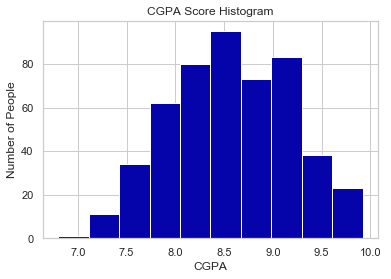

In [165]:
#Visualization - histogram
CGPA_graph = np.reshape(np.asarray(CGPA), (500))
n, bins, patches = plt.hist(x=CGPA_graph, bins=10, color='#0504aa')
plt.grid(axis='number of people', alpha=0.75)
plt.xlabel('CGPA')
plt.ylabel('Number of People')
plt.title('CGPA Score Histogram')

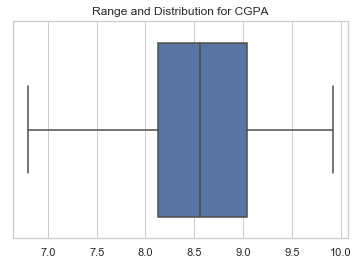

In [166]:
#Visualization - boxplot
sns.set(style="whitegrid")
sns.boxplot(CGPA).set_title('Range and Distribution for CGPA')
plt.show()

From the boxplot above, we can see that there are no outliers in this dataset. This means that the data in this sample are relatively centered, and there are no statistically uncommon values. 

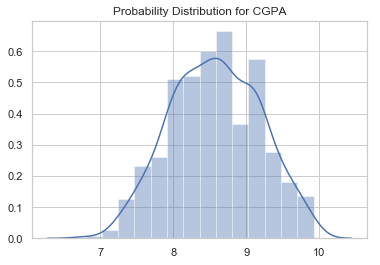

In [167]:
#Visualization - Probability Distribution
sns.distplot(CGPA).set_title('Probability Distribution for CGPA')
plt.show()

In the probability distribution graph for CGPA above, we can see that the distribution of the sample data roughly follow the normal distribution.

# Conclusion and Future Research

Based on the high average GRE Test score and the high average CGPA score, together with the small variations of the dataset, it is safe to conclude that this sample represents an above-average group of applicants.
Future researchers could utilize this dataset to predict the chance of admission for applicants by inputting the related values.  